# Analysis - EV Market Trend Data

##### Dyab Asdi, Evan Xia, Raymond Sun

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Pre-Process Data

In [36]:
# read data
df1 = pd.read_csv("Electric_Vehicle_Population_Data1.csv")
df2 = pd.read_csv("Electric_Vehicle_Population_Data2.csv")
df3 = pd.read_csv("Electric_Vehicle_Population_Data3.csv")

df = pd.concat([df1, df2, df3], ignore_index=True)

numerical_columns = ["Model Year", "Electric Range", "Base MSRP"]

print(df[numerical_columns].median())
df[numerical_columns].describe()
df.info()

Model Year        2021.0
Electric Range       6.0
Base MSRP            0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495346 entries, 0 to 495345
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         495346 non-null  object 
 1   County                                             495339 non-null  object 
 2   City                                               495339 non-null  object 
 3   State                                              495346 non-null  object 
 4   Postal Code                                        495339 non-null  float64
 5   Model Year                                         495346 non-null  int64  
 6   Make                                               495346 non-null  object 
 7   Model                                              495326 non-nul

In [39]:
numerical_columns.append("VIN (1-10)")
remaining_cols = list(set(df.columns) - set(numerical_columns))
df[remaining_cols].mode().iloc[0]
# df[remaining_cols].nunique()
num_zeros = (df['Base MSRP'] == 0).sum()
print(num_zeros + 27)

485102


In [20]:
# Checking missing values
missing_data = df.isnull()
missing_data.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
# Counting missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

VIN (1-10)
VIN (1-10)
False    495346
Name: count, dtype: int64

County
County
False    495339
True          7
Name: count, dtype: int64

City
City
False    495339
True          7
Name: count, dtype: int64

State
State
False    495346
Name: count, dtype: int64

Postal Code
Postal Code
False    495339
True          7
Name: count, dtype: int64

Model Year
Model Year
False    495346
Name: count, dtype: int64

Make
Make
False    495346
Name: count, dtype: int64

Model
Model
False    495326
True         20
Name: count, dtype: int64

Electric Vehicle Type
Electric Vehicle Type
False    495346
Name: count, dtype: int64

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle (CAFV) Eligibility
False    495346
Name: count, dtype: int64

Electric Range
Electric Range
False    495319
True         27
Name: count, dtype: int64

Base MSRP
Base MSRP
False    495319
True         27
Name: count, dtype: int64

Legislative District
Legislative District
False    494238
True      

In [23]:
# Replacing numerical values with 
for col in numerical_columns:
    if col in df.columns and df[col].isnull().sum() > 0:
        median_value = df[col].median()
        print(f"Filling missing values in {col} with median: {median_value}")
        df[col] = df[col].fillna(median_value)

Filling missing values in Electric Range with median: 6.0
Filling missing values in Base MSRP with median: 0.0


In [24]:
for col in remaining_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        print(f"Filling missing values in {col} with mode: {mode_value}")
        df[col] = df[col].fillna(mode_value)

Filling missing values in 2020 Census Tract with mode: 53033028200.0
Filling missing values in Legislative District with mode: 41.0
Filling missing values in Vehicle Location with mode: POINT (-122.13158 47.67858)
Filling missing values in City with mode: Seattle
Filling missing values in Electric Utility with mode: PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
Filling missing values in Postal Code with mode: 98052.0
Filling missing values in County with mode: King
Filling missing values in Model with mode: MODEL Y


In [25]:
duplicates = df.duplicated()
duplicate_count = duplicates.sum()
print(f"Number of exact duplicates: {duplicate_count}")

Number of exact duplicates: 56051


In [26]:
df_cleaned = df.drop_duplicates().reset_index(drop=True)

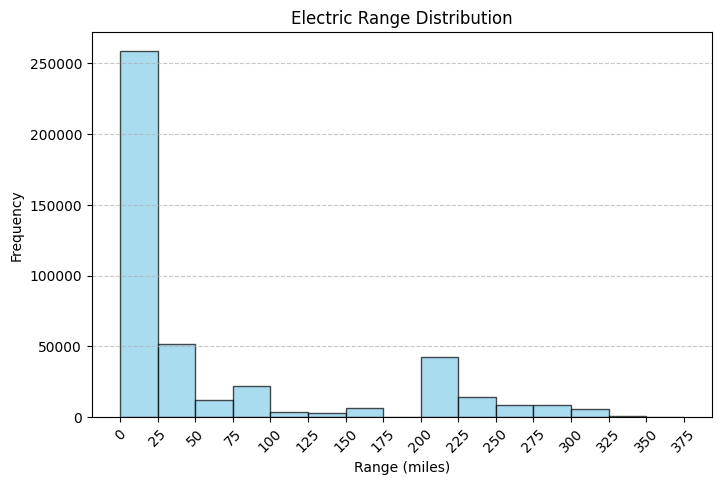

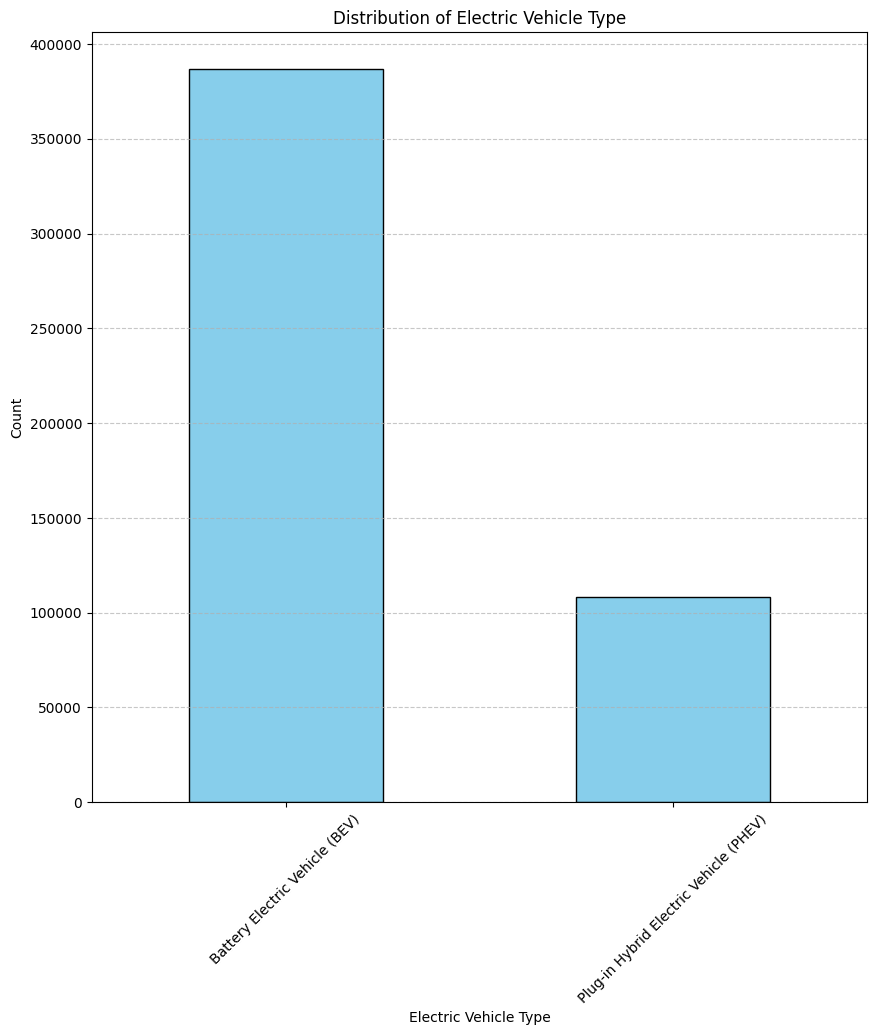

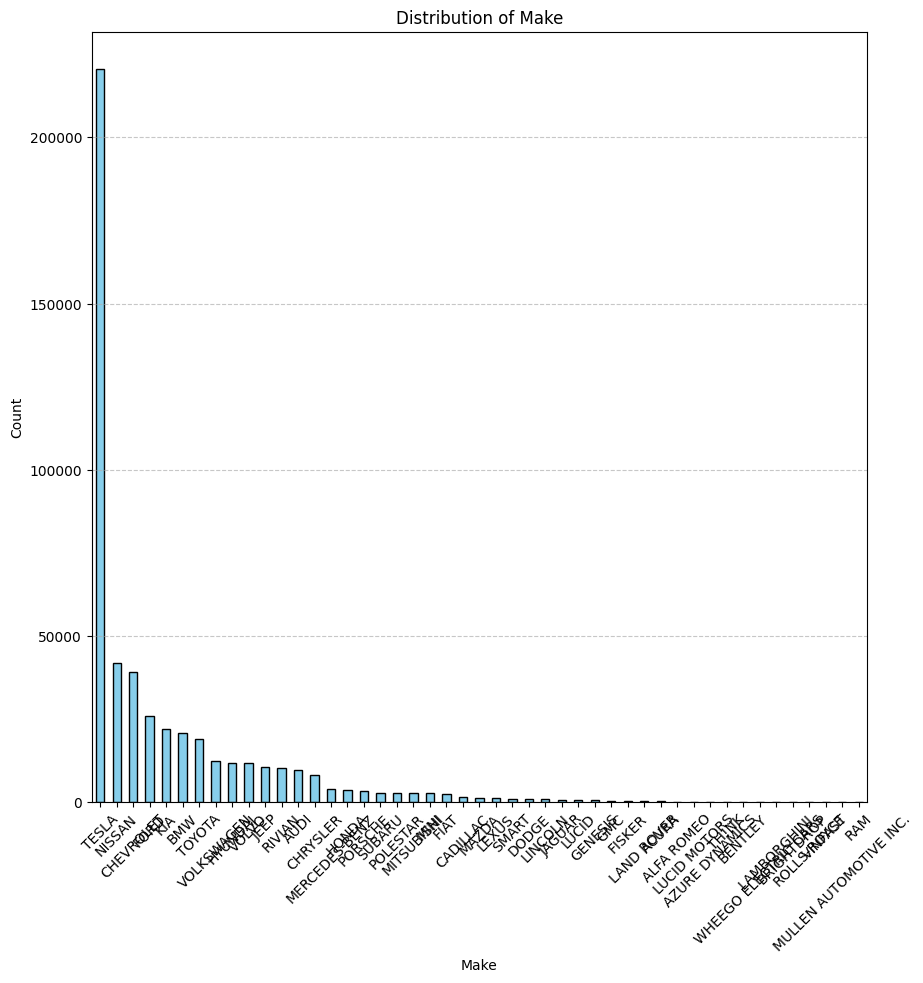

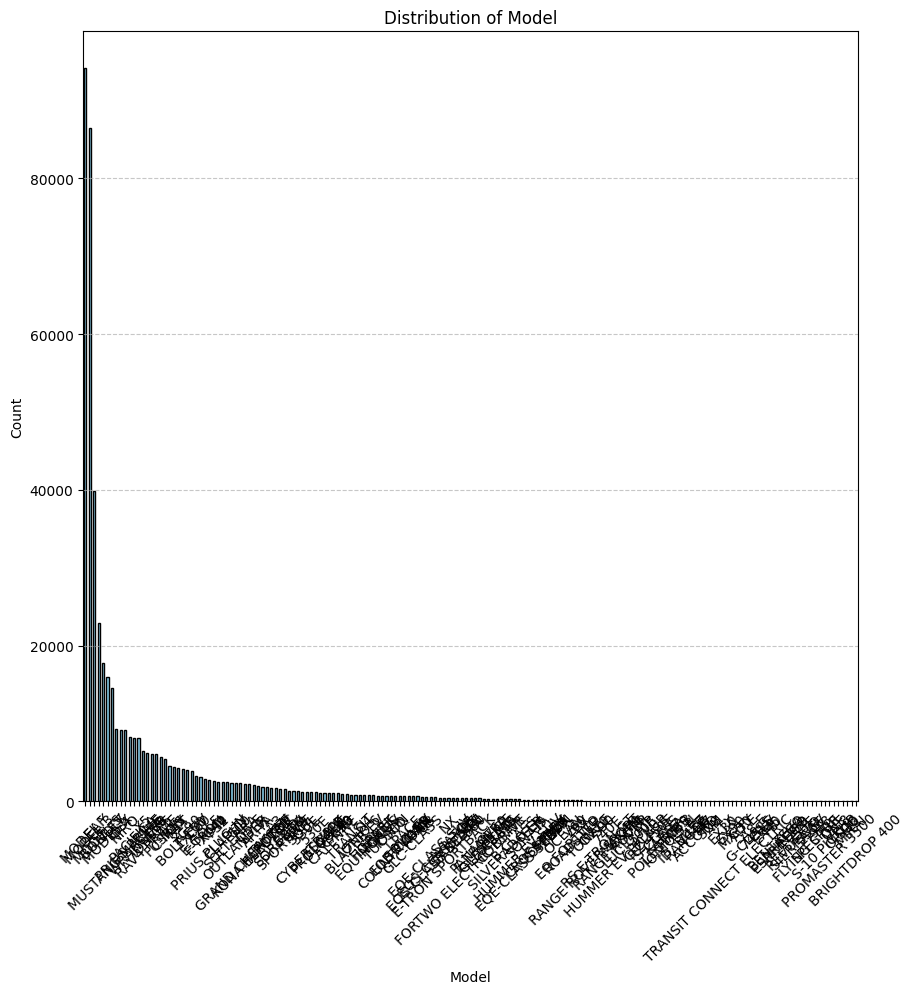

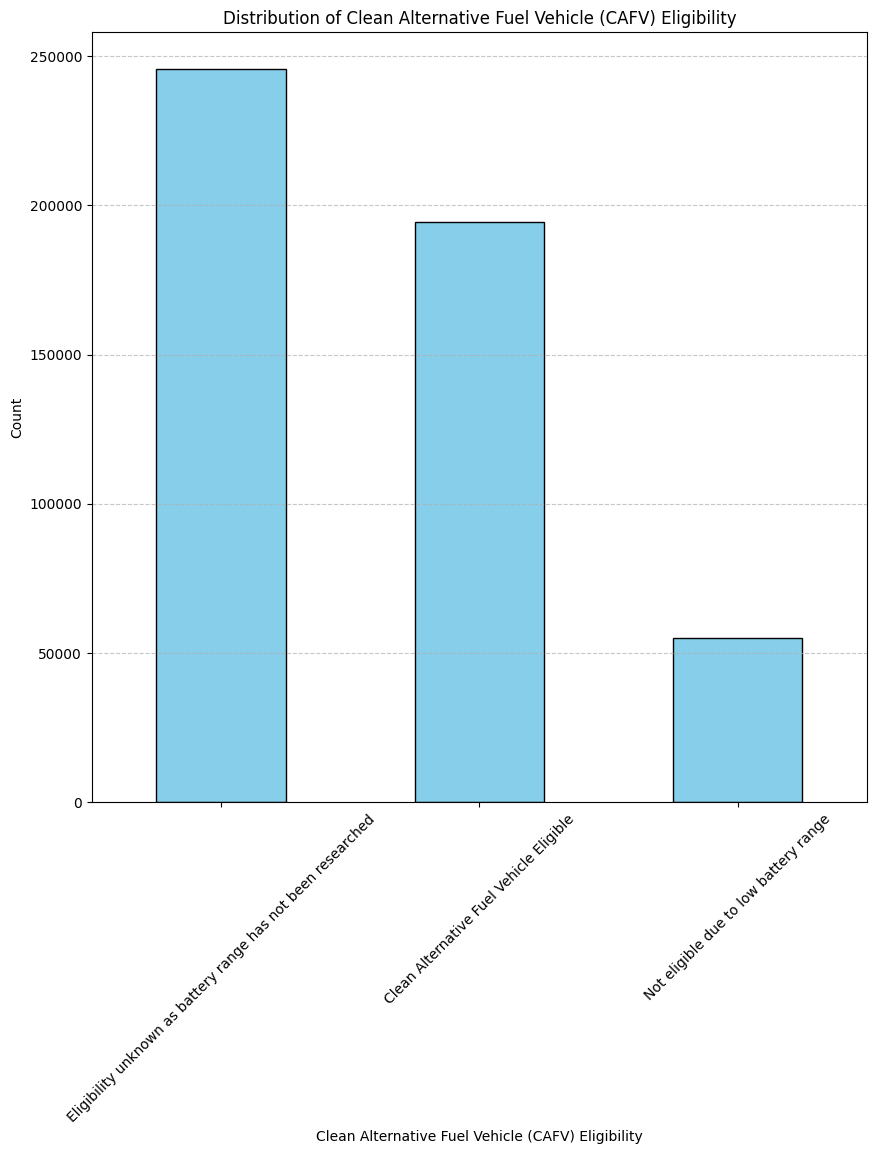

In [35]:
# Define bin edges from 0 to 600 in steps of 25
bins = np.arange(0, 400, 25)  # 625 ensures the last bin includes 600

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['Electric Range'], bins=bins, color='skyblue', edgecolor='black', alpha=0.7)

# Customization
plt.title("Electric Range Distribution")
plt.xlabel("Range (miles)")
plt.ylabel("Frequency")
plt.xticks(bins, rotation=45)  # Label bins at every 25
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save figure
plt.savefig("electric_range_distribution.png", dpi=300, bbox_inches='tight')

plt.show()

# df_cleaned = df_cleaned[]
categorical_cols = ['Electric Vehicle Type', 'Make', 'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Create histograms for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 10))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f"{col}-histogram-ds1.png", dpi = 300)

In [21]:
df2 = pd.read_csv("2016cityandcountylightdutyvehicleinventory.csv")
df2.head()

,state_abbr,gisjoin,city_id,city_name,fuel_type_org,fuel_type,class,before 1980,1980-99,1990-99,...,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1
0,AL,G01000124,100124,Abbeville,BI,Other/Unknown,Car,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,G01000124,100124,Abbeville,DIES,Diesel vehicle,Car,NaN,0.07%,NaN,...,NaN,NaN,0.000006,NaN,NaN,0.000005,0.000000,NaN,NaN,NaN
2,AL,G01000124,100124,Abbeville,DIES,Diesel vehicle,Truck,NaN,0.09%,0.50%,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00009,NaN,NaN
3,AL,G01000124,100124,Abbeville,DIES,Diesel vehicle,Unknown,0.05%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,G01000124,100124,Abbeville,ELECTRIC VEHICLE,Electric vehicle,Car,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307828 entries, 0 to 307827
Data columns (total 51 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   state_abbr     307828 non-null  object 
 1   gisjoin        307828 non-null  object 
 2   city_id        307828 non-null  int64  
 3   city_name      307828 non-null  object 
 4   fuel_type_org  307828 non-null  object 
 5   fuel_type      307828 non-null  object 
 6   class          307828 non-null  object 
 7   before 1980    61295 non-null   object 
 8   1980-99        138906 non-null  object 
 9   1990-99        175552 non-null  object 
 10  2000           161313 non-null  object 
 11  2001           175587 non-null  object 
 12  2002           186299 non-null  object 
 13  2003           166500 non-null  object 
 14  2004           171179 non-null  object 
 15  2005           176674 non-null  object 
 16  2006           162632 non-null  object 
 17  2007           154881 non-nul

In [16]:
df2.describe()

,city_id,before 1980.1,1980-99.1,1990-99.1,2000.1,2001.1,2002.1,2003.1,2004.1,2005.1,...,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1
count,3.078280e+05,61295.0,138906.0,175552.0,161313.000000,175587.000000,186299.000000,166500.000000,171179.000000,176674.000000,...,167226.000000,165797.000000,172040.000000,188563.000000,189540.000000,183738.000000,183442.000000,166665.000000,113715.000000,714.0
mean,3.123254e+06,0.0,0.0,0.0,0.000280,0.000266,0.000279,0.000323,0.000338,0.000326,...,0.000201,0.000243,0.000268,0.000253,0.000268,0.000286,0.000288,0.000248,0.000033,0.0
std,1.425476e+06,0.0,0.0,0.0,0.000468,0.000478,0.000523,0.000541,0.000631,0.000655,...,0.000361,0.000408,0.000419,0.000425,0.000489,0.000468,0.000529,0.000474,0.000110,0.0
min,1.001240e+05,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.957225e+06,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.336900e+06,0.0,0.0,0.0,0.000007,0.000000,0.000008,0.000016,0.000008,0.000008,...,0.000000,0.000048,0.000091,0.000038,0.000036,0.000067,0.000043,0.000044,0.000000,0.0
75%,4.240272e+06,0.0,0.0,0.0,0.000507,0.000400,0.000243,0.000588,0.000583,0.000412,...,0.000221,0.000272,0.000336,0.000317,0.000296,0.000360,0.000369,0.000289,0.000000,0.0
max,5.686665e+06,0.0,0.0,0.0,0.021110,0.016108,0.043706,0.062735,0.060606,0.049925,...,0.008333,0.005682,0.008333,0.044964,0.041152,0.013701,0.053648,0.018345,0.005987,0.0


In [18]:
cols = df2.columns
for col in cols:
    print(f"{col} Mode: {df2[col].mode().values}")

state_abbr Mode: ['PA']
gisjoin Mode: ['G06044000' 'G06067000']
city_id Mode: [3613035]
city_name Mode: ['Washington']
fuel_type_org Mode: ['GAS']
fuel_type Mode: ['Gasoline vehicle']
class Mode: ['Car']
before 1980 Mode: ['0.00%']
1980-99 Mode: ['0.00%']
1990-99 Mode: ['0.00%']
2000 Mode: ['0.00%']
2001 Mode: ['0.00%']
2002 Mode: ['0.00%']
2003 Mode: ['0.00%']
2004 Mode: ['0.00%']
2005 Mode: ['0.00%']
2006 Mode: ['0.00%']
2007 Mode: ['0.00%']
2008 Mode: ['0.00%']
2009 Mode: ['0.00%']
2010 Mode: ['0.00%']
2011 Mode: ['0.00%']
2012 Mode: ['0.00%']
2013 Mode: ['0.00%']
2014 Mode: ['0.00%']
2015 Mode: ['0.00%']
2016 Mode: ['0.00%']
2017 Mode: ['0.00%']
2018 Mode: ['0.00%']
before 1980.1 Mode: [0.]
1980-99.1 Mode: [0.]
1990-99.1 Mode: [0.]
2000.1 Mode: [0.]
2001.1 Mode: [0.]
2002.1 Mode: [0.]
2003.1 Mode: [0.]
2004.1 Mode: [0.]
2005.1 Mode: [0.]
2006.1 Mode: [0.]
2007.1 Mode: [0.]
2008.1 Mode: [0.]
2009.1 Mode: [0.]
2010.1 Mode: [0.]
2011.1 Mode: [0.]
2012.1 Mode: [0.]
2013.1 Mode: [0.]
20